In [1]:
import numpy as np
import landlab
from landlab import RasterModelGrid
from landlab.io import read_esri_ascii, write_esri_ascii
from landlab.plot.imshow import imshow_grid
import matplotlib.pyplot as plt

# sums up cell areas or given runoff volume along the flow directions
from landlab.components import FlowAccumulator, SinkFiller
# fills depressions along the flow path
from landlab.components import DepressionFinderAndRouter
# reports drainage area or flow volume of a grid
from landlab.components.flow_accum import find_drainage_area_and_discharge

from landlab.utils import watershed

In [2]:
# MEL-14 wet season year 1
(mg_m14_20201203_sfm,z_m14_20201203_sfm) = read_esri_ascii("m14/wsyr1/m14_20201203_sfm.asc", \
    name='topographic__elevation')
(mg_m14_20210224_sfm,z_m14_20210224_sfm) = read_esri_ascii("m14/wsyr1/m14_20210224_sfm.asc", \
    name='topographic__elevation')
(mg_m14_20201203_lidar,z_m14_20201203_lidar) = read_esri_ascii("m14/wsyr1/m14_20201203_lidar.asc", \
    name='topographic__elevation')

# MEL-14 dry season year 1
(mg_m14_20210603_sfm,z_m14_20210603_sfm) = read_esri_ascii("m14/dsyr1/m14_20210603_sfm.asc", \
    name='topographic__elevation')
(mg_m14_20210914_sfm,z_m14_20210914_sfm) = read_esri_ascii("m14/dsyr1/m14_20210914_sfm.asc", \
    name='topographic__elevation')
(mg_m14_20210603_lidar,z_m14_20210603_lidar) = read_esri_ascii("m14/dsyr1/m14_20210603_lidar.asc", \
    name='topographic__elevation')
(mg_m14_20210914_lidar,z_m14_20210914_lidar) = read_esri_ascii("m14/dsyr1/m14_20210914_lidar.asc", \
    name='topographic__elevation')

# MEL-14 wet season year 2
(mg_m14_20220309_sfm,z_m14_20220309_sfm) = read_esri_ascii("m14/wsyr2/m14_20220309_sfm.asc", \
    name='topographic__elevation')
(mg_m14_20220316_sfm,z_m14_20220316_sfm) = read_esri_ascii("m14/wsyr2/m14_20220316_sfm.asc", \
    name='topographic__elevation')
(mg_m14_20220324_sfm,z_m14_20220324_sfm) = read_esri_ascii("m14/wsyr2/m14_20220324_sfm.asc", \
    name='topographic__elevation')
(mg_m14_20220411_sfm,z_m14_20220411_sfm) = read_esri_ascii("m14/wsyr2/m14_20220411_sfm.asc", \
    name='topographic__elevation')
(mg_m14_20220428_sfm,z_m14_20220428_sfm) = read_esri_ascii("m14/wsyr2/m14_20220428_sfm.asc", \
    name='topographic__elevation')
(mg_m14_20220601_sfm,z_m14_20220601_sfm) = read_esri_ascii("m14/wsyr2/m14_20220601_sfm.asc", \
    name='topographic__elevation')
(mg_m14_20220309_lidar,z_m14_20220309_lidar) = read_esri_ascii("m14/wsyr2/m14_20220309_lidar.asc", \
    name='topographic__elevation')
(mg_m14_20220601_lidar,z_m14_20220601_lidar) = read_esri_ascii("m14/wsyr2/m14_20220601_lidar.asc", \
    name='topographic__elevation')
# =====================================================================================================================================
# KID-13 wet season year 1
(mg_k13_20201109_sfm,z_k13_20201109_sfm) = read_esri_ascii("k13/wsyr1/k13_20201109_sfm.asc", \
    name='topographic__elevation')
(mg_k13_20210208_sfm,z_k13_20210208_sfm) = read_esri_ascii("k13/wsyr1/k13_20210208_sfm.asc", \
    name='topographic__elevation')
(mg_k13_20210406_sfm,z_k13_20210406_sfm) = read_esri_ascii("k13/wsyr1/k13_20210406_sfm.asc", \
    name='topographic__elevation')
(mg_k13_20210513_sfm,z_k13_20210513_sfm) = read_esri_ascii("k13/wsyr1/k13_20210513_sfm.asc", \
    name='topographic__elevation')
(mg_k13_20201109_lidar,z_k13_20201109_lidar) = read_esri_ascii("k13/wsyr1/k13_20201109_lidar.asc", \
    name='topographic__elevation')
(mg_k13_20210513_lidar,z_k13_20210513_lidar) = read_esri_ascii("k13/wsyr1/k13_20210513_lidar.asc", \
    name='topographic__elevation')

# KID-13 dry season year 1
(mg_k13_20210604_sfm,z_k13_20210604_sfm) = read_esri_ascii("k13/dsyr1/k13_20210604_sfm.asc", \
    name='topographic__elevation')
(mg_k13_20210819_sfm,z_k13_20210819_sfm) = read_esri_ascii("k13/dsyr1/k13_20210819_sfm.asc", \
    name='topographic__elevation')
(mg_k13_20210913_sfm,z_k13_20210913_sfm) = read_esri_ascii("k13/dsyr1/k13_20210913_sfm.asc", \
    name='topographic__elevation')
(mg_k13_20210604_lidar,z_k13_20210604_lidar) = read_esri_ascii("k13/dsyr1/k13_20210604_lidar.asc", \
    name='topographic__elevation')
(mg_k13_20210913_lidar,z_k13_20210913_lidar) = read_esri_ascii("k13/dsyr1/k13_20210913_lidar.asc", \
    name='topographic__elevation')

# KID-13 wet season year 2
(mg_k13_20211007_sfm,z_k13_20211007_sfm) = read_esri_ascii("k13/wsyr2/k13_20211007_sfm.asc", \
    name='topographic__elevation')
(mg_k13_20220208_sfm,z_k13_20220208_sfm) = read_esri_ascii("k13/wsyr2/k13_20220208_sfm.asc", \
    name='topographic__elevation')
(mg_k13_20220503_sfm,z_k13_20220503_sfm) = read_esri_ascii("k13/wsyr2/k13_20220503_sfm.asc", \
    name='topographic__elevation')
(mg_k13_20220531_sfm,z_k13_20220531_sfm) = read_esri_ascii("k13/wsyr2/k13_20220531_sfm.asc", \
    name='topographic__elevation')
(mg_k13_20211007_lidar,z_k13_20211007_lidar) = read_esri_ascii("k13/wsyr2/k13_20211007_lidar.asc", \
    name='topographic__elevation')
(mg_k13_20220531_lidar,z_k13_20220531_lidar) = read_esri_ascii("k13/wsyr2/k13_20220531_lidar.asc", \
    name='topographic__elevation')

## Run flow router

In [3]:
mg_m14_20201203_sfm.status_at_node[z_m14_20201203_sfm == -9999] = mg_m14_20201203_sfm.BC_NODE_IS_FIXED_VALUE
mg_m14_20210224_sfm.status_at_node[z_m14_20210224_sfm == -9999] = mg_m14_20210224_sfm.BC_NODE_IS_FIXED_VALUE
mg_m14_20201203_lidar.status_at_node[z_m14_20201203_lidar == -9999] = mg_m14_20201203_lidar.BC_NODE_IS_FIXED_VALUE

mg_m14_20210603_sfm.status_at_node[z_m14_20210603_sfm == -9999] = mg_m14_20210603_sfm.BC_NODE_IS_FIXED_VALUE
mg_m14_20210914_sfm.status_at_node[z_m14_20210914_sfm == -9999] = mg_m14_20210914_sfm.BC_NODE_IS_FIXED_VALUE
mg_m14_20210603_lidar.status_at_node[z_m14_20210603_lidar == -9999] = mg_m14_20210603_lidar.BC_NODE_IS_FIXED_VALUE
mg_m14_20210914_lidar.status_at_node[z_m14_20210914_lidar == -9999] = mg_m14_20210914_lidar.BC_NODE_IS_FIXED_VALUE

mg_m14_20220309_sfm.status_at_node[z_m14_20220309_sfm == -9999] = mg_m14_20220309_sfm.BC_NODE_IS_FIXED_VALUE
mg_m14_20220316_sfm.status_at_node[z_m14_20220316_sfm == -9999] = mg_m14_20220316_sfm.BC_NODE_IS_FIXED_VALUE
mg_m14_20220324_sfm.status_at_node[z_m14_20220324_sfm == -9999] = mg_m14_20220324_sfm.BC_NODE_IS_FIXED_VALUE
mg_m14_20220411_sfm.status_at_node[z_m14_20220411_sfm == -9999] = mg_m14_20220411_sfm.BC_NODE_IS_FIXED_VALUE
mg_m14_20220428_sfm.status_at_node[z_m14_20220428_sfm == -9999] = mg_m14_20220428_sfm.BC_NODE_IS_FIXED_VALUE
mg_m14_20220601_sfm.status_at_node[z_m14_20220601_sfm == -9999] = mg_m14_20220601_sfm.BC_NODE_IS_FIXED_VALUE
mg_m14_20220309_lidar.status_at_node[z_m14_20220309_lidar == -9999] = mg_m14_20220309_lidar.BC_NODE_IS_FIXED_VALUE
mg_m14_20220601_lidar.status_at_node[z_m14_20220601_lidar == -9999] = mg_m14_20220601_lidar.BC_NODE_IS_FIXED_VALUE

# =====================================================================================================================================
mg_k13_20201109_sfm.status_at_node[z_k13_20201109_sfm == -9999] = mg_k13_20201109_sfm.BC_NODE_IS_FIXED_VALUE
mg_k13_20210208_sfm.status_at_node[z_k13_20210208_sfm == -9999] = mg_k13_20210208_sfm.BC_NODE_IS_FIXED_VALUE
mg_k13_20210406_sfm.status_at_node[z_k13_20210406_sfm == -9999] = mg_k13_20210406_sfm.BC_NODE_IS_FIXED_VALUE
mg_k13_20210513_sfm.status_at_node[z_k13_20210513_sfm == -9999] = mg_k13_20210513_sfm.BC_NODE_IS_FIXED_VALUE
mg_k13_20201109_lidar.status_at_node[z_k13_20201109_lidar == -9999] = mg_k13_20201109_lidar.BC_NODE_IS_FIXED_VALUE
mg_k13_20210513_lidar.status_at_node[z_k13_20210513_lidar == -9999] = mg_k13_20210513_lidar.BC_NODE_IS_FIXED_VALUE

mg_k13_20210604_sfm.status_at_node[z_k13_20210604_sfm == -9999] = mg_k13_20210604_sfm.BC_NODE_IS_FIXED_VALUE
mg_k13_20210819_sfm.status_at_node[z_k13_20210819_sfm == -9999] = mg_k13_20210819_sfm.BC_NODE_IS_FIXED_VALUE
mg_k13_20210913_sfm.status_at_node[z_k13_20210913_sfm == -9999] = mg_k13_20210913_sfm.BC_NODE_IS_FIXED_VALUE
mg_k13_20210604_lidar.status_at_node[z_k13_20210604_lidar == -9999] = mg_k13_20210604_lidar.BC_NODE_IS_FIXED_VALUE
mg_k13_20210913_lidar.status_at_node[z_k13_20210913_lidar == -9999] = mg_k13_20210913_lidar.BC_NODE_IS_FIXED_VALUE

mg_k13_20211007_sfm.status_at_node[z_k13_20211007_sfm == -9999] = mg_k13_20211007_sfm.BC_NODE_IS_FIXED_VALUE
mg_k13_20220208_sfm.status_at_node[z_k13_20220208_sfm == -9999] = mg_k13_20220208_sfm.BC_NODE_IS_FIXED_VALUE
mg_k13_20220503_sfm.status_at_node[z_k13_20220503_sfm == -9999] = mg_k13_20220503_sfm.BC_NODE_IS_FIXED_VALUE
mg_k13_20220531_sfm.status_at_node[z_k13_20220531_sfm == -9999] = mg_k13_20220531_sfm.BC_NODE_IS_FIXED_VALUE
mg_k13_20211007_lidar.status_at_node[z_k13_20211007_lidar == -9999] = mg_k13_20211007_lidar.BC_NODE_IS_FIXED_VALUE
mg_k13_20220531_lidar.status_at_node[z_k13_20220531_lidar == -9999] = mg_k13_20220531_lidar.BC_NODE_IS_FIXED_VALUE

In [4]:
fa_m14_20201203_sfm = FlowAccumulator(mg_m14_20201203_sfm,
                     surface='topographic__elevation',
                     flow_director='FlowDirectorD8',
                     runoff_rate=0.01, # suppose there is 1 cm runoff generated in all grid cells
                     depression_finder='DepressionFinderAndRouter')
fa_m14_20210224_sfm = FlowAccumulator(mg_m14_20210224_sfm,
                     surface='topographic__elevation',
                     flow_director='FlowDirectorD8',
                     runoff_rate=0.01, # suppose there is 1 cm runoff generated in all grid cells
                     depression_finder='DepressionFinderAndRouter')
fa_m14_20201203_lidar = FlowAccumulator(mg_m14_20201203_lidar,
                     surface='topographic__elevation',
                     flow_director='FlowDirectorD8',
                     runoff_rate=0.01, # suppose there is 1 cm runoff generated in all grid cells
                     depression_finder='DepressionFinderAndRouter')

fa_m14_20210603_sfm = FlowAccumulator(mg_m14_20210603_sfm,
                     surface='topographic__elevation',
                     flow_director='FlowDirectorD8',
                     runoff_rate=0.01, # suppose there is 1 cm runoff generated in all grid cells
                     depression_finder='DepressionFinderAndRouter')
fa_m14_20210914_sfm = FlowAccumulator(mg_m14_20210914_sfm,
                     surface='topographic__elevation',
                     flow_director='FlowDirectorD8',
                     runoff_rate=0.01, # suppose there is 1 cm runoff generated in all grid cells
                     depression_finder='DepressionFinderAndRouter')
fa_m14_20210603_lidar = FlowAccumulator(mg_m14_20210603_lidar,
                     surface='topographic__elevation',
                     flow_director='FlowDirectorD8',
                     runoff_rate=0.01, # suppose there is 1 cm runoff generated in all grid cells
                     depression_finder='DepressionFinderAndRouter')
fa_m14_20210914_lidar = FlowAccumulator(mg_m14_20210914_lidar,
                     surface='topographic__elevation',
                     flow_director='FlowDirectorD8',
                     runoff_rate=0.01, # suppose there is 1 cm runoff generated in all grid cells
                     depression_finder='DepressionFinderAndRouter')

fa_m14_20220309_sfm = FlowAccumulator(mg_m14_20220309_sfm,
                     surface='topographic__elevation',
                     flow_director='FlowDirectorD8',
                     runoff_rate=0.01, # suppose there is 1 cm runoff generated in all grid cells
                     depression_finder='DepressionFinderAndRouter')
fa_m14_20220316_sfm = FlowAccumulator(mg_m14_20220316_sfm,
                     surface='topographic__elevation',
                     flow_director='FlowDirectorD8',
                     runoff_rate=0.01, # suppose there is 1 cm runoff generated in all grid cells
                     depression_finder='DepressionFinderAndRouter')
fa_m14_20220324_sfm = FlowAccumulator(mg_m14_20220324_sfm,
                     surface='topographic__elevation',
                     flow_director='FlowDirectorD8',
                     runoff_rate=0.01, # suppose there is 1 cm runoff generated in all grid cells
                     depression_finder='DepressionFinderAndRouter')
fa_m14_20220411_sfm = FlowAccumulator(mg_m14_20220411_sfm,
                     surface='topographic__elevation',
                     flow_director='FlowDirectorD8',
                     runoff_rate=0.01, # suppose there is 1 cm runoff generated in all grid cells
                     depression_finder='DepressionFinderAndRouter')
fa_m14_20220428_sfm = FlowAccumulator(mg_m14_20220428_sfm,
                     surface='topographic__elevation',
                     flow_director='FlowDirectorD8',
                     runoff_rate=0.01, # suppose there is 1 cm runoff generated in all grid cells
                     depression_finder='DepressionFinderAndRouter')
fa_m14_20220601_sfm = FlowAccumulator(mg_m14_20220601_sfm,
                     surface='topographic__elevation',
                     flow_director='FlowDirectorD8',
                     runoff_rate=0.01, # suppose there is 1 cm runoff generated in all grid cells
                     depression_finder='DepressionFinderAndRouter')
fa_m14_20220309_lidar = FlowAccumulator(mg_m14_20220309_lidar,
                     surface='topographic__elevation',
                     flow_director='FlowDirectorD8',
                     runoff_rate=0.01, # suppose there is 1 cm runoff generated in all grid cells
                     depression_finder='DepressionFinderAndRouter')
fa_m14_20220601_lidar = FlowAccumulator(mg_m14_20220601_lidar,
                     surface='topographic__elevation',
                     flow_director='FlowDirectorD8',
                     runoff_rate=0.01, # suppose there is 1 cm runoff generated in all grid cells
                     depression_finder='DepressionFinderAndRouter')
# =====================================================================================================================================
fa_k13_20201109_sfm = FlowAccumulator(mg_k13_20201109_sfm,
                     surface='topographic__elevation',
                     flow_director='FlowDirectorD8',
                     runoff_rate=0.01, # suppose there is 1 cm runoff generated in all grid cells
                     depression_finder='DepressionFinderAndRouter')
fa_k13_20210208_sfm = FlowAccumulator(mg_k13_20210208_sfm,
                     surface='topographic__elevation',
                     flow_director='FlowDirectorD8',
                     runoff_rate=0.01, # suppose there is 1 cm runoff generated in all grid cells
                     depression_finder='DepressionFinderAndRouter')                     
fa_k13_20210406_sfm = FlowAccumulator(mg_k13_20210406_sfm,
                     surface='topographic__elevation',
                     flow_director='FlowDirectorD8',
                     runoff_rate=0.01, # suppose there is 1 cm runoff generated in all grid cells
                     depression_finder='DepressionFinderAndRouter')
fa_k13_20210513_sfm = FlowAccumulator(mg_k13_20210513_sfm,
                     surface='topographic__elevation',
                     flow_director='FlowDirectorD8',
                     runoff_rate=0.01, # suppose there is 1 cm runoff generated in all grid cells
                     depression_finder='DepressionFinderAndRouter')
fa_k13_20201109_lidar = FlowAccumulator(mg_k13_20201109_lidar,
                     surface='topographic__elevation',
                     flow_director='FlowDirectorD8',
                     runoff_rate=0.01, # suppose there is 1 cm runoff generated in all grid cells
                     depression_finder='DepressionFinderAndRouter')
fa_k13_20210513_lidar = FlowAccumulator(mg_k13_20210513_lidar,
                     surface='topographic__elevation',
                     flow_director='FlowDirectorD8',
                     runoff_rate=0.01, # suppose there is 1 cm runoff generated in all grid cells
                     depression_finder='DepressionFinderAndRouter')

fa_k13_20210604_sfm = FlowAccumulator(mg_k13_20210604_sfm,
                     surface='topographic__elevation',
                     flow_director='FlowDirectorD8',
                     runoff_rate=0.01, # suppose there is 1 cm runoff generated in all grid cells
                     depression_finder='DepressionFinderAndRouter')
fa_k13_20210819_sfm = FlowAccumulator(mg_k13_20210819_sfm,
                     surface='topographic__elevation',
                     flow_director='FlowDirectorD8',
                     runoff_rate=0.01, # suppose there is 1 cm runoff generated in all grid cells
                     depression_finder='DepressionFinderAndRouter')
fa_k13_20210913_sfm = FlowAccumulator(mg_k13_20210913_sfm,
                     surface='topographic__elevation',
                     flow_director='FlowDirectorD8',
                     runoff_rate=0.01, # suppose there is 1 cm runoff generated in all grid cells
                     depression_finder='DepressionFinderAndRouter')
fa_k13_20210604_lidar = FlowAccumulator(mg_k13_20210604_lidar,
                     surface='topographic__elevation',
                     flow_director='FlowDirectorD8',
                     runoff_rate=0.01, # suppose there is 1 cm runoff generated in all grid cells
                     depression_finder='DepressionFinderAndRouter')
fa_k13_20210913_lidar = FlowAccumulator(mg_k13_20210913_lidar,
                     surface='topographic__elevation',
                     flow_director='FlowDirectorD8',
                     runoff_rate=0.01, # suppose there is 1 cm runoff generated in all grid cells
                     depression_finder='DepressionFinderAndRouter')

fa_k13_20211007_sfm = FlowAccumulator(mg_k13_20211007_sfm,
                     surface='topographic__elevation',
                     flow_director='FlowDirectorD8',
                     runoff_rate=0.01, # suppose there is 1 cm runoff generated in all grid cells
                     depression_finder='DepressionFinderAndRouter')
fa_k13_20220208_sfm = FlowAccumulator(mg_k13_20220208_sfm,
                     surface='topographic__elevation',
                     flow_director='FlowDirectorD8',
                     runoff_rate=0.01, # suppose there is 1 cm runoff generated in all grid cells
                     depression_finder='DepressionFinderAndRouter')
fa_k13_20220503_sfm = FlowAccumulator(mg_k13_20220503_sfm,
                     surface='topographic__elevation',
                     flow_director='FlowDirectorD8',
                     runoff_rate=0.01, # suppose there is 1 cm runoff generated in all grid cells
                     depression_finder='DepressionFinderAndRouter')
fa_k13_20220531_sfm = FlowAccumulator(mg_k13_20220531_sfm,
                     surface='topographic__elevation',
                     flow_director='FlowDirectorD8',
                     runoff_rate=0.01, # suppose there is 1 cm runoff generated in all grid cells
                     depression_finder='DepressionFinderAndRouter')
fa_k13_20211007_lidar = FlowAccumulator(mg_k13_20211007_lidar,
                     surface='topographic__elevation',
                     flow_director='FlowDirectorD8',
                     runoff_rate=0.01, # suppose there is 1 cm runoff generated in all grid cells
                     depression_finder='DepressionFinderAndRouter')
fa_k13_20220531_lidar = FlowAccumulator(mg_k13_20220531_lidar,
                     surface='topographic__elevation',
                     flow_director='FlowDirectorD8',
                     runoff_rate=0.01, # suppose there is 1 cm runoff generated in all grid cells
                     depression_finder='DepressionFinderAndRouter')

In [5]:
(da_m14_20201203_sfm, Q_m14_20201203_sfm) = fa_m14_20201203_sfm.accumulate_flow()
(da_m14_20210224_sfm, Q_m14_20210224_sfm) = fa_m14_20210224_sfm.accumulate_flow()
(da_m14_20201203_lidar, Q_m14_20201203_lidar) = fa_m14_20201203_lidar.accumulate_flow()

(da_m14_20210603_sfm, Q_m14_20210603_sfm) = fa_m14_20210603_sfm.accumulate_flow()
(da_m14_20210914_sfm, Q_m14_20210914_sfm) = fa_m14_20210914_sfm.accumulate_flow()
(da_m14_20210603_lidar, Q_m14_20210603_lidar) = fa_m14_20210603_lidar.accumulate_flow()
(da_m14_20210914_lidar, Q_m14_20210914_lidar) = fa_m14_20210914_lidar.accumulate_flow()

(da_m14_20220309_sfm, Q_m14_20220309_sfm) = fa_m14_20220309_sfm.accumulate_flow()
(da_m14_20220316_sfm, Q_m14_20220316_sfm) = fa_m14_20220316_sfm.accumulate_flow()
(da_m14_20220324_sfm, Q_m14_20220324_sfm) = fa_m14_20220324_sfm.accumulate_flow()
(da_m14_20220411_sfm, Q_m14_20220411_sfm) = fa_m14_20220411_sfm.accumulate_flow()
(da_m14_20220428_sfm, Q_m14_20220428_sfm) = fa_m14_20220428_sfm.accumulate_flow()
(da_m14_20220601_sfm, Q_m14_20220601_sfm) = fa_m14_20220601_sfm.accumulate_flow()
(da_m14_20220309_lidar, Q_m14_20220309_lidar) = fa_m14_20220309_lidar.accumulate_flow()
(da_m14_20220601_lidar, Q_m14_20220601_lidar) = fa_m14_20220601_lidar.accumulate_flow()
# =====================================================================================================================================
(da_k13_20201109_sfm, Q_k13_20201109_sfm) = fa_k13_20201109_sfm.accumulate_flow()
(da_k13_20210208_sfm, Q_k13_20210208_sfm) = fa_k13_20210208_sfm.accumulate_flow()
(da_k13_20210406_sfm, Q_k13_20210406_sfm) = fa_k13_20210406_sfm.accumulate_flow()
(da_k13_20210513_sfm, Q_k13_20210513_sfm) = fa_k13_20210513_sfm.accumulate_flow()
(da_k13_20201109_lidar, Q_k13_20201109_lidar) = fa_k13_20201109_lidar.accumulate_flow()
(da_k13_20210513_lidar, Q_k13_20210513_lidar) = fa_k13_20210513_lidar.accumulate_flow()

(da_k13_20210604_sfm, Q_k13_20210604_sfm) = fa_k13_20210604_sfm.accumulate_flow()
(da_k13_20210819_sfm, Q_k13_20210819_sfm) = fa_k13_20210819_sfm.accumulate_flow()
(da_k13_20210913_sfm, Q_k13_20210913_sfm) = fa_k13_20210913_sfm.accumulate_flow()
(da_k13_20210604_lidar, Q_k13_20210604_lidar) = fa_k13_20210604_lidar.accumulate_flow()
(da_k13_20210913_lidar, Q_k13_20210913_lidar) = fa_k13_20210913_lidar.accumulate_flow()

(da_k13_20211007_sfm, Q_k13_20211007_sfm) = fa_k13_20211007_sfm.accumulate_flow()
(da_k13_20220208_sfm, Q_k13_20220208_sfm) = fa_k13_20220208_sfm.accumulate_flow()
(da_k13_20220503_sfm, Q_k13_20220503_sfm) = fa_k13_20220503_sfm.accumulate_flow()
(da_k13_20220531_sfm, Q_k13_20220531_sfm) = fa_k13_20220531_sfm.accumulate_flow()
(da_k13_20211007_lidar, Q_k13_20211007_lidar) = fa_k13_20211007_lidar.accumulate_flow()
(da_k13_20220531_lidar, Q_k13_20220531_lidar) = fa_k13_20220531_lidar.accumulate_flow()

## Erosion index example

In [6]:
#calculate unit flow
q_m14_20201203_sfm = Q_m14_20201203_sfm/0.25
q_m14_20210224_sfm = Q_m14_20210224_sfm/0.25
q_m14_20201203_lidar = Q_m14_20201203_lidar/0.25

q_m14_20210603_sfm = Q_m14_20210603_sfm/0.25
q_m14_20210914_sfm = Q_m14_20210914_sfm/0.25
q_m14_20210603_lidar = Q_m14_20210603_lidar/0.25
q_m14_20210914_lidar = Q_m14_20210914_lidar/0.25

q_m14_20220309_sfm = Q_m14_20220309_sfm/0.25
q_m14_20220316_sfm = Q_m14_20220316_sfm/0.25
q_m14_20220324_sfm = Q_m14_20220324_sfm/0.25
q_m14_20220411_sfm = Q_m14_20220411_sfm/0.25
q_m14_20220428_sfm = Q_m14_20220428_sfm/0.25
q_m14_20220601_sfm = Q_m14_20220601_sfm/0.25
q_m14_20220309_lidar = Q_m14_20220309_lidar/0.25
q_m14_20220601_lidar = Q_m14_20220601_lidar/0.25
# =====================================================================================================================================
q_k13_20201109_sfm = Q_k13_20201109_sfm/0.25
q_k13_20210208_sfm = Q_k13_20210208_sfm/0.25
q_k13_20210406_sfm = Q_k13_20210406_sfm/0.25
q_k13_20210513_sfm = Q_k13_20210513_sfm/0.25
q_k13_20201109_lidar = Q_k13_20201109_lidar/0.25
q_k13_20210513_lidar = Q_k13_20210513_lidar/0.25

q_k13_20210604_sfm = Q_k13_20210604_sfm/0.25
q_k13_20210819_sfm = Q_k13_20210819_sfm/0.25
q_k13_20210913_sfm = Q_k13_20210913_sfm/0.25
q_k13_20210604_lidar = Q_k13_20210604_lidar/0.25
q_k13_20210913_lidar = Q_k13_20210913_lidar/0.25

q_k13_20211007_sfm = Q_k13_20211007_sfm/0.25
q_k13_20220208_sfm = Q_k13_20220208_sfm/0.25
q_k13_20220503_sfm = Q_k13_20220503_sfm/0.25
q_k13_20220531_sfm = Q_k13_20220531_sfm/0.25
q_k13_20211007_lidar = Q_k13_20211007_lidar/0.25
q_k13_20220531_lidar = Q_k13_20220531_lidar/0.25

In [7]:
#calculate slope
S_m14_20201203_sfm = mg_m14_20201203_sfm.calc_slope_at_node(z_m14_20201203_sfm)
S_m14_20210224_sfm = mg_m14_20210224_sfm.calc_slope_at_node(z_m14_20210224_sfm)
S_m14_20201203_lidar = mg_m14_20201203_lidar.calc_slope_at_node(z_m14_20201203_lidar)

S_m14_20210603_sfm = mg_m14_20210603_sfm.calc_slope_at_node(z_m14_20210603_sfm)
S_m14_20210914_sfm = mg_m14_20210914_sfm.calc_slope_at_node(z_m14_20210914_sfm)
S_m14_20210603_lidar = mg_m14_20210603_lidar.calc_slope_at_node(z_m14_20210603_lidar)
S_m14_20210914_lidar = mg_m14_20210914_lidar.calc_slope_at_node(z_m14_20210914_lidar)

S_m14_20220309_sfm = mg_m14_20220309_sfm.calc_slope_at_node(z_m14_20220309_sfm)
S_m14_20220316_sfm = mg_m14_20220316_sfm.calc_slope_at_node(z_m14_20220316_sfm)
S_m14_20220324_sfm = mg_m14_20220324_sfm.calc_slope_at_node(z_m14_20220324_sfm)
S_m14_20220411_sfm = mg_m14_20220411_sfm.calc_slope_at_node(z_m14_20220411_sfm)
S_m14_20220428_sfm = mg_m14_20220428_sfm.calc_slope_at_node(z_m14_20220428_sfm)
S_m14_20220601_sfm = mg_m14_20220601_sfm.calc_slope_at_node(z_m14_20220601_sfm)
S_m14_20220309_lidar = mg_m14_20220309_lidar.calc_slope_at_node(z_m14_20220309_lidar)
S_m14_20220601_lidar = mg_m14_20220601_lidar.calc_slope_at_node(z_m14_20220601_lidar)
# =====================================================================================================================================
S_k13_20201109_sfm = mg_k13_20201109_sfm.calc_slope_at_node(z_k13_20201109_sfm)
S_k13_20210208_sfm = mg_k13_20210208_sfm.calc_slope_at_node(z_k13_20210208_sfm)
S_k13_20210406_sfm = mg_k13_20210406_sfm.calc_slope_at_node(z_k13_20210406_sfm)
S_k13_20210513_sfm = mg_k13_20210513_sfm.calc_slope_at_node(z_k13_20210513_sfm)
S_k13_20201109_lidar = mg_k13_20201109_lidar.calc_slope_at_node(z_k13_20201109_lidar)
S_k13_20210513_lidar = mg_k13_20210513_lidar.calc_slope_at_node(z_k13_20210513_lidar)

S_k13_20210604_sfm = mg_k13_20210604_sfm.calc_slope_at_node(z_k13_20210604_sfm)
S_k13_20210819_sfm = mg_k13_20210819_sfm.calc_slope_at_node(z_k13_20210819_sfm)
S_k13_20210913_sfm = mg_k13_20210913_sfm.calc_slope_at_node(z_k13_20210913_sfm)
S_k13_20210604_lidar = mg_k13_20210604_lidar.calc_slope_at_node(z_k13_20210604_lidar)
S_k13_20210913_lidar = mg_k13_20210913_lidar.calc_slope_at_node(z_k13_20210913_lidar)

S_k13_20211007_sfm = mg_k13_20211007_sfm.calc_slope_at_node(z_k13_20211007_sfm)
S_k13_20220208_sfm = mg_k13_20220208_sfm.calc_slope_at_node(z_k13_20220208_sfm)
S_k13_20220503_sfm = mg_k13_20220503_sfm.calc_slope_at_node(z_k13_20220503_sfm)
S_k13_20220531_sfm = mg_k13_20220531_sfm.calc_slope_at_node(z_k13_20220531_sfm)
S_k13_20211007_lidar = mg_k13_20211007_lidar.calc_slope_at_node(z_k13_20211007_lidar)
S_k13_20220531_lidar = mg_k13_20220531_lidar.calc_slope_at_node(z_k13_20220531_lidar)

In [8]:
rho = 1000
g = 9.81
n_b = 0.05
beta = rho*g*n_b**0.6
m1 = 0.6
n1 = 0.7
tau_c = 0.566

#Calculate tau
tau_m14_20201203_sfm = beta*q_m14_20201203_sfm**m1*S_m14_20201203_sfm**n1
tau_m14_20210224_sfm = beta*q_m14_20210224_sfm**m1*S_m14_20210224_sfm**n1
tau_m14_20201203_lidar = beta*q_m14_20201203_lidar**m1*S_m14_20201203_lidar**n1

tau_m14_20210603_sfm = beta*q_m14_20210603_sfm**m1*S_m14_20210603_sfm**n1
tau_m14_20210914_sfm = beta*q_m14_20210914_sfm**m1*S_m14_20210914_sfm**n1
tau_m14_20210603_lidar = beta*q_m14_20210603_lidar**m1*S_m14_20210603_lidar**n1
tau_m14_20210914_lidar = beta*q_m14_20210914_lidar**m1*S_m14_20210914_lidar**n1

tau_m14_20220309_sfm = beta*q_m14_20220309_sfm**m1*S_m14_20220309_sfm**n1
tau_m14_20220316_sfm = beta*q_m14_20220316_sfm**m1*S_m14_20220316_sfm**n1
tau_m14_20220324_sfm = beta*q_m14_20220324_sfm**m1*S_m14_20220324_sfm**n1
tau_m14_20220411_sfm = beta*q_m14_20220411_sfm**m1*S_m14_20220411_sfm**n1
tau_m14_20220428_sfm = beta*q_m14_20220428_sfm**m1*S_m14_20220428_sfm**n1
tau_m14_20220601_sfm = beta*q_m14_20220601_sfm**m1*S_m14_20220601_sfm**n1
tau_m14_20220309_lidar = beta*q_m14_20220309_lidar**m1*S_m14_20220309_lidar**n1
tau_m14_20220601_lidar = beta*q_m14_20220601_lidar**m1*S_m14_20220601_lidar**n1
# =====================================================================================================================================
tau_k13_20201109_sfm = beta*q_k13_20201109_sfm**m1*S_k13_20201109_sfm**n1
tau_k13_20210208_sfm = beta*q_k13_20210208_sfm**m1*S_k13_20210208_sfm**n1
tau_k13_20210406_sfm = beta*q_k13_20210406_sfm**m1*S_k13_20210406_sfm**n1
tau_k13_20210513_sfm = beta*q_k13_20210513_sfm**m1*S_k13_20210513_sfm**n1
tau_k13_20201109_lidar = beta*q_k13_20201109_lidar**m1*S_k13_20201109_lidar**n1
tau_k13_20210513_lidar = beta*q_k13_20210513_lidar**m1*S_k13_20210513_lidar**n1

tau_k13_20210604_sfm = beta*q_k13_20210604_sfm**m1*S_k13_20210604_sfm**n1
tau_k13_20210819_sfm = beta*q_k13_20210819_sfm**m1*S_k13_20210819_sfm**n1
tau_k13_20210913_sfm = beta*q_k13_20210913_sfm**m1*S_k13_20210913_sfm**n1
tau_k13_20210604_lidar = beta*q_k13_20210604_lidar**m1*S_k13_20210604_lidar**n1
tau_k13_20210913_lidar = beta*q_k13_20210913_lidar**m1*S_k13_20210913_lidar**n1

tau_k13_20211007_sfm = beta*q_k13_20211007_sfm**m1*S_k13_20211007_sfm**n1
tau_k13_20220208_sfm = beta*q_k13_20220208_sfm**m1*S_k13_20220208_sfm**n1
tau_k13_20220503_sfm = beta*q_k13_20220503_sfm**m1*S_k13_20220503_sfm**n1
tau_k13_20220531_sfm = beta*q_k13_20220531_sfm**m1*S_k13_20220531_sfm**n1
tau_k13_20211007_lidar = beta*q_k13_20211007_lidar**m1*S_k13_20211007_lidar**n1
tau_k13_20220531_lidar = beta*q_k13_20220531_lidar**m1*S_k13_20220531_lidar**n1

In [9]:
#Add tau as field
mg_m14_20201203_sfm.add_field('tau', tau_m14_20201203_sfm, at='node', clobber=True)
mg_m14_20210224_sfm.add_field('tau', tau_m14_20210224_sfm, at='node', clobber=True)
mg_m14_20201203_lidar.add_field('tau', tau_m14_20201203_lidar, at='node', clobber=True)

mg_m14_20210603_sfm.add_field('tau', tau_m14_20210603_sfm, at='node', clobber=True)
mg_m14_20210914_sfm.add_field('tau', tau_m14_20210914_sfm, at='node', clobber=True)
mg_m14_20210603_lidar.add_field('tau', tau_m14_20210603_lidar, at='node', clobber=True)
mg_m14_20210914_lidar.add_field('tau', tau_m14_20210914_lidar, at='node', clobber=True)

mg_m14_20220309_sfm.add_field('tau', tau_m14_20220309_sfm, at='node', clobber=True)
mg_m14_20220316_sfm.add_field('tau', tau_m14_20220316_sfm, at='node', clobber=True)
mg_m14_20220324_sfm.add_field('tau', tau_m14_20220324_sfm, at='node', clobber=True)
mg_m14_20220411_sfm.add_field('tau', tau_m14_20220411_sfm, at='node', clobber=True)
mg_m14_20220428_sfm.add_field('tau', tau_m14_20220428_sfm, at='node', clobber=True)
mg_m14_20220601_sfm.add_field('tau', tau_m14_20220601_sfm, at='node', clobber=True)
mg_m14_20220309_lidar.add_field('tau', tau_m14_20220309_lidar, at='node', clobber=True)
mg_m14_20220601_lidar.add_field('tau', tau_m14_20220601_lidar, at='node', clobber=True)
# =====================================================================================================================================
#Add tau as field
mg_k13_20201109_sfm.add_field('tau', tau_k13_20201109_sfm, at='node', clobber=True)
mg_k13_20210208_sfm.add_field('tau', tau_k13_20210208_sfm, at='node', clobber=True)
mg_k13_20210406_sfm.add_field('tau', tau_k13_20210406_sfm, at='node', clobber=True)
mg_k13_20210513_sfm.add_field('tau', tau_k13_20210513_sfm, at='node', clobber=True)
mg_k13_20201109_lidar.add_field('tau', tau_k13_20201109_lidar, at='node', clobber=True)
mg_k13_20210513_lidar.add_field('tau', tau_k13_20210513_lidar, at='node', clobber=True)

mg_k13_20210604_sfm.add_field('tau', tau_k13_20210604_sfm, at='node', clobber=True)
mg_k13_20210819_sfm.add_field('tau', tau_k13_20210819_sfm, at='node', clobber=True)
mg_k13_20210913_sfm.add_field('tau', tau_k13_20210913_sfm, at='node', clobber=True)
mg_k13_20210604_lidar.add_field('tau', tau_k13_20210604_lidar, at='node', clobber=True)
mg_k13_20210913_lidar.add_field('tau', tau_k13_20210913_lidar, at='node', clobber=True)

mg_k13_20211007_sfm.add_field('tau', tau_k13_20211007_sfm, at='node', clobber=True)
mg_k13_20220208_sfm.add_field('tau', tau_k13_20220208_sfm, at='node', clobber=True)
mg_k13_20220503_sfm.add_field('tau', tau_k13_20220503_sfm, at='node', clobber=True)
mg_k13_20220531_sfm.add_field('tau', tau_k13_20220531_sfm, at='node', clobber=True)
mg_k13_20211007_lidar.add_field('tau', tau_k13_20211007_lidar, at='node', clobber=True)
mg_k13_20220531_lidar.add_field('tau', tau_k13_20220531_lidar, at='node', clobber=True)

array([0., 0., 0., ..., 0., 0., 0.])

In [10]:
#Fix nodata nodes
mg_m14_20201203_sfm.at_node['tau'][mg_m14_20201203_sfm.status_at_node==mg_m14_20201203_sfm.BC_NODE_IS_FIXED_VALUE] = 0
mg_m14_20210224_sfm.at_node['tau'][mg_m14_20210224_sfm.status_at_node==mg_m14_20210224_sfm.BC_NODE_IS_FIXED_VALUE] = 0
mg_m14_20201203_lidar.at_node['tau'][mg_m14_20201203_lidar.status_at_node==mg_m14_20201203_lidar.BC_NODE_IS_FIXED_VALUE] = 0

mg_m14_20210603_sfm.at_node['tau'][mg_m14_20210603_sfm.status_at_node==mg_m14_20210603_sfm.BC_NODE_IS_FIXED_VALUE] = 0
mg_m14_20210914_sfm.at_node['tau'][mg_m14_20210914_sfm.status_at_node==mg_m14_20210914_sfm.BC_NODE_IS_FIXED_VALUE] = 0
mg_m14_20210603_lidar.at_node['tau'][mg_m14_20210603_lidar.status_at_node==mg_m14_20210603_lidar.BC_NODE_IS_FIXED_VALUE] = 0
mg_m14_20210914_lidar.at_node['tau'][mg_m14_20210914_lidar.status_at_node==mg_m14_20210914_lidar.BC_NODE_IS_FIXED_VALUE] = 0

mg_m14_20220309_sfm.at_node['tau'][mg_m14_20220309_sfm.status_at_node==mg_m14_20220309_sfm.BC_NODE_IS_FIXED_VALUE] = 0
mg_m14_20220316_sfm.at_node['tau'][mg_m14_20220316_sfm.status_at_node==mg_m14_20220316_sfm.BC_NODE_IS_FIXED_VALUE] = 0
mg_m14_20220324_sfm.at_node['tau'][mg_m14_20220324_sfm.status_at_node==mg_m14_20220324_sfm.BC_NODE_IS_FIXED_VALUE] = 0
mg_m14_20220411_sfm.at_node['tau'][mg_m14_20220411_sfm.status_at_node==mg_m14_20220411_sfm.BC_NODE_IS_FIXED_VALUE] = 0
mg_m14_20220428_sfm.at_node['tau'][mg_m14_20220428_sfm.status_at_node==mg_m14_20220428_sfm.BC_NODE_IS_FIXED_VALUE] = 0
mg_m14_20220601_sfm.at_node['tau'][mg_m14_20220601_sfm.status_at_node==mg_m14_20220601_sfm.BC_NODE_IS_FIXED_VALUE] = 0
mg_m14_20220309_lidar.at_node['tau'][mg_m14_20220309_lidar.status_at_node==mg_m14_20220309_lidar.BC_NODE_IS_FIXED_VALUE] = 0
mg_m14_20220601_lidar.at_node['tau'][mg_m14_20220601_lidar.status_at_node==mg_m14_20220601_lidar.BC_NODE_IS_FIXED_VALUE] = 0

# =====================================================================================================================================
#Fix nodata nodes
mg_k13_20201109_sfm.at_node['tau'][mg_k13_20201109_sfm.status_at_node==mg_k13_20201109_sfm.BC_NODE_IS_FIXED_VALUE] = 0
mg_k13_20210208_sfm.at_node['tau'][mg_k13_20210208_sfm.status_at_node==mg_k13_20210208_sfm.BC_NODE_IS_FIXED_VALUE] = 0
mg_k13_20210406_sfm.at_node['tau'][mg_k13_20210406_sfm.status_at_node==mg_k13_20210406_sfm.BC_NODE_IS_FIXED_VALUE] = 0
mg_k13_20210513_sfm.at_node['tau'][mg_k13_20210513_sfm.status_at_node==mg_k13_20210513_sfm.BC_NODE_IS_FIXED_VALUE] = 0
mg_k13_20201109_lidar.at_node['tau'][mg_k13_20201109_lidar.status_at_node==mg_k13_20201109_lidar.BC_NODE_IS_FIXED_VALUE] = 0
mg_k13_20210513_lidar.at_node['tau'][mg_k13_20210513_lidar.status_at_node==mg_k13_20210513_lidar.BC_NODE_IS_FIXED_VALUE] = 0

mg_k13_20210604_sfm.at_node['tau'][mg_k13_20210604_sfm.status_at_node==mg_k13_20210604_sfm.BC_NODE_IS_FIXED_VALUE] = 0
mg_k13_20210819_sfm.at_node['tau'][mg_k13_20210819_sfm.status_at_node==mg_k13_20210819_sfm.BC_NODE_IS_FIXED_VALUE] = 0
mg_k13_20210913_sfm.at_node['tau'][mg_k13_20210913_sfm.status_at_node==mg_k13_20210913_sfm.BC_NODE_IS_FIXED_VALUE] = 0
mg_k13_20210604_lidar.at_node['tau'][mg_k13_20210604_lidar.status_at_node==mg_k13_20210604_lidar.BC_NODE_IS_FIXED_VALUE] = 0
mg_k13_20210913_lidar.at_node['tau'][mg_k13_20210913_lidar.status_at_node==mg_k13_20210913_lidar.BC_NODE_IS_FIXED_VALUE] = 0

mg_k13_20211007_sfm.at_node['tau'][mg_k13_20211007_sfm.status_at_node==mg_k13_20211007_sfm.BC_NODE_IS_FIXED_VALUE] = 0
mg_k13_20220208_sfm.at_node['tau'][mg_k13_20220208_sfm.status_at_node==mg_k13_20220208_sfm.BC_NODE_IS_FIXED_VALUE] = 0
mg_k13_20220503_sfm.at_node['tau'][mg_k13_20220503_sfm.status_at_node==mg_k13_20220503_sfm.BC_NODE_IS_FIXED_VALUE] = 0
mg_k13_20220531_sfm.at_node['tau'][mg_k13_20220531_sfm.status_at_node==mg_k13_20220531_sfm.BC_NODE_IS_FIXED_VALUE] = 0
mg_k13_20211007_lidar.at_node['tau'][mg_k13_20211007_lidar.status_at_node==mg_k13_20211007_lidar.BC_NODE_IS_FIXED_VALUE] = 0
mg_k13_20220531_lidar.at_node['tau'][mg_k13_20220531_lidar.status_at_node==mg_k13_20220531_lidar.BC_NODE_IS_FIXED_VALUE] = 0

In [11]:
#calculate erosion index - 1.5
idx_m14_20201203_15_sfm = [(x-tau_c)**2 if (x-tau_c)>=0 else 0 for x in tau_m14_20201203_sfm]
idx_m14_20210224_15_sfm = [(x-tau_c)**2 if (x-tau_c)>=0 else 0 for x in tau_m14_20210224_sfm]
idx_m14_20201203_15_lidar = [(x-tau_c)**2 if (x-tau_c)>=0 else 0 for x in tau_m14_20201203_lidar]

idx_m14_20210603_15_sfm = [(x-tau_c)**2 if (x-tau_c)>=0 else 0 for x in tau_m14_20210603_sfm]
idx_m14_20210914_15_sfm = [(x-tau_c)**2 if (x-tau_c)>=0 else 0 for x in tau_m14_20210914_sfm]
idx_m14_20210603_15_lidar = [(x-tau_c)**2 if (x-tau_c)>=0 else 0 for x in tau_m14_20210603_lidar]
idx_m14_20210914_15_lidar = [(x-tau_c)**2 if (x-tau_c)>=0 else 0 for x in tau_m14_20210914_lidar]

idx_m14_20220309_15_sfm = [(x-tau_c)**2 if (x-tau_c)>=0 else 0 for x in tau_m14_20220309_sfm]
idx_m14_20220316_15_sfm = [(x-tau_c)**2 if (x-tau_c)>=0 else 0 for x in tau_m14_20220316_sfm]
idx_m14_20220324_15_sfm = [(x-tau_c)**2 if (x-tau_c)>=0 else 0 for x in tau_m14_20220324_sfm]
idx_m14_20220411_15_sfm = [(x-tau_c)**2 if (x-tau_c)>=0 else 0 for x in tau_m14_20220411_sfm]
idx_m14_20220428_15_sfm = [(x-tau_c)**2 if (x-tau_c)>=0 else 0 for x in tau_m14_20220428_sfm]
idx_m14_20220601_15_sfm = [(x-tau_c)**2 if (x-tau_c)>=0 else 0 for x in tau_m14_20220601_sfm]
idx_m14_20220309_15_lidar = [(x-tau_c)**2 if (x-tau_c)>=0 else 0 for x in tau_m14_20220309_lidar]
idx_m14_20220601_15_lidar = [(x-tau_c)**2 if (x-tau_c)>=0 else 0 for x in tau_m14_20220601_lidar]

# #calculate erosion index - 2.5
# idx_m14_20201203_25 = [(x-tau_c)**2.5 if (x-tau_c)>=0 else 0 for x in tau_m14_20201203]
# idx_m14_20210224_25 = [(x-tau_c)**2.5 if (x-tau_c)>=0 else 0 for x in tau_m14_20210224]

# idx_m14_20210603_25 = [(x-tau_c)**2.5 if (x-tau_c)>=0 else 0 for x in tau_m14_20210603]
# idx_m14_20210914_25 = [(x-tau_c)**2.5 if (x-tau_c)>=0 else 0 for x in tau_m14_20210914]

# idx_m14_20220309_25 = [(x-tau_c)**2.5 if (x-tau_c)>=0 else 0 for x in tau_m14_20220309]
# idx_m14_20220316_25 = [(x-tau_c)**2.5 if (x-tau_c)>=0 else 0 for x in tau_m14_20220316]
# idx_m14_20220324_25 = [(x-tau_c)**2.5 if (x-tau_c)>=0 else 0 for x in tau_m14_20220324]
# idx_m14_20220411_25 = [(x-tau_c)**2.5 if (x-tau_c)>=0 else 0 for x in tau_m14_20220411]
# idx_m14_20220428_25 = [(x-tau_c)**2.5 if (x-tau_c)>=0 else 0 for x in tau_m14_20220428]
# idx_m14_20220601_25 = [(x-tau_c)**2.5 if (x-tau_c)>=0 else 0 for x in tau_m14_20220601]

# =====================================================================================================================================

#calculate erosion index - 1.5
idx_k13_20201109_15_sfm = [(x-tau_c)**2 if (x-tau_c)>=0 else 0 for x in tau_k13_20201109_sfm]
idx_k13_20210208_15_sfm = [(x-tau_c)**2 if (x-tau_c)>=0 else 0 for x in tau_k13_20210208_sfm]
idx_k13_20210406_15_sfm = [(x-tau_c)**2 if (x-tau_c)>=0 else 0 for x in tau_k13_20210406_sfm]
idx_k13_20210513_15_sfm = [(x-tau_c)**2 if (x-tau_c)>=0 else 0 for x in tau_k13_20210513_sfm]
idx_k13_20201109_15_lidar = [(x-tau_c)**2 if (x-tau_c)>=0 else 0 for x in tau_k13_20201109_lidar]
idx_k13_20210513_15_lidar = [(x-tau_c)**2 if (x-tau_c)>=0 else 0 for x in tau_k13_20210513_lidar]

idx_k13_20210604_15_sfm = [(x-tau_c)**2 if (x-tau_c)>=0 else 0 for x in tau_k13_20210604_sfm]
idx_k13_20210819_15_sfm = [(x-tau_c)**2 if (x-tau_c)>=0 else 0 for x in tau_k13_20210819_sfm]
idx_k13_20210913_15_sfm = [(x-tau_c)**2 if (x-tau_c)>=0 else 0 for x in tau_k13_20210913_sfm]
idx_k13_20210604_15_lidar = [(x-tau_c)**2 if (x-tau_c)>=0 else 0 for x in tau_k13_20210604_lidar]
idx_k13_20210913_15_lidar = [(x-tau_c)**2 if (x-tau_c)>=0 else 0 for x in tau_k13_20210913_lidar]

idx_k13_20211007_15_sfm = [(x-tau_c)**2 if (x-tau_c)>=0 else 0 for x in tau_k13_20211007_sfm]
idx_k13_20220208_15_sfm = [(x-tau_c)**2 if (x-tau_c)>=0 else 0 for x in tau_k13_20220208_sfm]
idx_k13_20220503_15_sfm = [(x-tau_c)**2 if (x-tau_c)>=0 else 0 for x in tau_k13_20220503_sfm]
idx_k13_20220531_15_sfm = [(x-tau_c)**2 if (x-tau_c)>=0 else 0 for x in tau_k13_20220531_sfm]
idx_k13_20211007_15_lidar = [(x-tau_c)**2 if (x-tau_c)>=0 else 0 for x in tau_k13_20211007_lidar]
idx_k13_20220531_15_lidar = [(x-tau_c)**2 if (x-tau_c)>=0 else 0 for x in tau_k13_20220531_lidar]

# #calculate erosion index - 2.5
# idx_k13_20201109_25 = [(x-tau_c)**2.5 if (x-tau_c)>=0 else 0 for x in tau_k13_20201109]
# idx_k13_20210208_25 = [(x-tau_c)**2.5 if (x-tau_c)>=0 else 0 for x in tau_k13_20210208]
# idx_k13_20210406_25 = [(x-tau_c)**2.5 if (x-tau_c)>=0 else 0 for x in tau_k13_20210406]
# idx_k13_20210513_25 = [(x-tau_c)**2.5 if (x-tau_c)>=0 else 0 for x in tau_k13_20210513]

# idx_k13_20210604_25 = [(x-tau_c)**2.5 if (x-tau_c)>=0 else 0 for x in tau_k13_20210604]
# idx_k13_20210819_25 = [(x-tau_c)**2.5 if (x-tau_c)>=0 else 0 for x in tau_k13_20210819]
# idx_k13_20210913_25 = [(x-tau_c)**2.5 if (x-tau_c)>=0 else 0 for x in tau_k13_20210913]

# idx_k13_20211007_25 = [(x-tau_c)**2.5 if (x-tau_c)>=0 else 0 for x in tau_k13_20211007]
# idx_k13_20220208_25 = [(x-tau_c)**2.5 if (x-tau_c)>=0 else 0 for x in tau_k13_20220208]
# idx_k13_20220503_25 = [(x-tau_c)**2.5 if (x-tau_c)>=0 else 0 for x in tau_k13_20220503]
# idx_k13_20220531_25 = [(x-tau_c)**2.5 if (x-tau_c)>=0 else 0 for x in tau_k13_20220531]

In [12]:
#sum dat index - 1.5
ero_idx_m14_20201203_15_sfm = sum(mg_m14_20201203_sfm.add_field('ero_idx_15', idx_m14_20201203_15_sfm, at='node', clobber=True))
ero_idx_m14_20210224_15_sfm = sum(mg_m14_20210224_sfm.add_field('ero_idx_15', idx_m14_20210224_15_sfm, at='node', clobber=True))
ero_idx_m14_20201203_15_lidar = sum(mg_m14_20201203_lidar.add_field('ero_idx_15', idx_m14_20201203_15_lidar, at='node', clobber=True))

ero_idx_m14_20210603_15_sfm = sum(mg_m14_20210603_sfm.add_field('ero_idx_15', idx_m14_20210603_15_sfm, at='node', clobber=True))
ero_idx_m14_20210914_15_sfm = sum(mg_m14_20210914_sfm.add_field('ero_idx_15', idx_m14_20210914_15_sfm, at='node', clobber=True))
ero_idx_m14_20210603_15_lidar = sum(mg_m14_20210603_lidar.add_field('ero_idx_15', idx_m14_20210603_15_lidar, at='node', clobber=True))
ero_idx_m14_20210914_15_lidar = sum(mg_m14_20210914_lidar.add_field('ero_idx_15', idx_m14_20210914_15_lidar, at='node', clobber=True))

ero_idx_m14_20220309_15_sfm = sum(mg_m14_20220309_sfm.add_field('ero_idx_15', idx_m14_20220309_15_sfm, at='node', clobber=True))
ero_idx_m14_20220316_15_sfm = sum(mg_m14_20220316_sfm.add_field('ero_idx_15', idx_m14_20220316_15_sfm, at='node', clobber=True))
ero_idx_m14_20220324_15_sfm = sum(mg_m14_20220324_sfm.add_field('ero_idx_15', idx_m14_20220324_15_sfm, at='node', clobber=True))
ero_idx_m14_20220411_15_sfm = sum(mg_m14_20220411_sfm.add_field('ero_idx_15', idx_m14_20220411_15_sfm, at='node', clobber=True))
ero_idx_m14_20220428_15_sfm = sum(mg_m14_20220428_sfm.add_field('ero_idx_15', idx_m14_20220428_15_sfm, at='node', clobber=True))
ero_idx_m14_20220601_15_sfm = sum(mg_m14_20220601_sfm.add_field('ero_idx_15', idx_m14_20220601_15_sfm, at='node', clobber=True))
ero_idx_m14_20220309_15_lidar = sum(mg_m14_20220309_lidar.add_field('ero_idx_15', idx_m14_20220309_15_lidar, at='node', clobber=True))
ero_idx_m14_20220601_15_lidar = sum(mg_m14_20220601_lidar.add_field('ero_idx_15', idx_m14_20220601_15_lidar, at='node', clobber=True))

# #sum dat index - 2.5
# ero_idx_m14_20201203_25 = sum(mg_m14_20201203_sfm.add_field('ero_idx_25', idx_m14_20201203_25, at='node', clobber=True))
# ero_idx_m14_20210224_25 = sum(mg_m14_20210224_sfm.add_field('ero_idx_25', idx_m14_20210224_25, at='node', clobber=True))

# ero_idx_m14_20210603_25 = sum(mg_m14_20210603_sfm.add_field('ero_idx_25', idx_m14_20210603_25, at='node', clobber=True))
# ero_idx_m14_20210914_25 = sum(mg_m14_20210914_sfm.add_field('ero_idx_25', idx_m14_20210914_25, at='node', clobber=True))

# ero_idx_m14_20220309_25 = sum(mg_m14_20220309_sfm.add_field('ero_idx_25', idx_m14_20220309_25, at='node', clobber=True))
# ero_idx_m14_20220316_25 = sum(mg_m14_20220316_sfm.add_field('ero_idx_25', idx_m14_20220316_25, at='node', clobber=True))
# ero_idx_m14_20220324_25 = sum(mg_m14_20220324_sfm.add_field('ero_idx_25', idx_m14_20220324_25, at='node', clobber=True))
# ero_idx_m14_20220411_25 = sum(mg_m14_20220411_sfm.add_field('ero_idx_25', idx_m14_20220411_25, at='node', clobber=True))
# ero_idx_m14_20220428_25 = sum(mg_m14_20220428_sfm.add_field('ero_idx_25', idx_m14_20220428_25, at='node', clobber=True))
# ero_idx_m14_20220601_25 = sum(mg_m14_20220601_sfm.add_field('ero_idx_25', idx_m14_20220601_25, at='node', clobber=True))

# =====================================================================================================================================

#sum dat index - 1.5
ero_idx_k13_20201109_15_sfm = sum(mg_k13_20201109_sfm.add_field('ero_idx_15', idx_k13_20201109_15_sfm, at='node', clobber=True))
ero_idx_k13_20210208_15_sfm = sum(mg_k13_20210208_sfm.add_field('ero_idx_15', idx_k13_20210208_15_sfm, at='node', clobber=True))
ero_idx_k13_20210406_15_sfm = sum(mg_k13_20210406_sfm.add_field('ero_idx_15', idx_k13_20210406_15_sfm, at='node', clobber=True))
ero_idx_k13_20210513_15_sfm = sum(mg_k13_20210513_sfm.add_field('ero_idx_15', idx_k13_20210513_15_sfm, at='node', clobber=True))
ero_idx_k13_20201109_15_lidar = sum(mg_k13_20201109_lidar.add_field('ero_idx_15', idx_k13_20201109_15_lidar, at='node', clobber=True))
ero_idx_k13_20210513_15_lidar = sum(mg_k13_20210513_lidar.add_field('ero_idx_15', idx_k13_20210513_15_lidar, at='node', clobber=True))

ero_idx_k13_20210604_15_sfm = sum(mg_k13_20210604_sfm.add_field('ero_idx_15', idx_k13_20210604_15_sfm, at='node', clobber=True))
ero_idx_k13_20210819_15_sfm = sum(mg_k13_20210819_sfm.add_field('ero_idx_15', idx_k13_20210819_15_sfm, at='node', clobber=True))
ero_idx_k13_20210913_15_sfm = sum(mg_k13_20210913_sfm.add_field('ero_idx_15', idx_k13_20210913_15_sfm, at='node', clobber=True))
ero_idx_k13_20210604_15_lidar = sum(mg_k13_20210604_lidar.add_field('ero_idx_15', idx_k13_20210604_15_lidar, at='node', clobber=True))
ero_idx_k13_20210913_15_lidar = sum(mg_k13_20210913_lidar.add_field('ero_idx_15', idx_k13_20210913_15_lidar, at='node', clobber=True))

ero_idx_k13_20211007_15_sfm = sum(mg_k13_20211007_sfm.add_field('ero_idx_15', idx_k13_20211007_15_sfm, at='node', clobber=True))
ero_idx_k13_20220208_15_sfm = sum(mg_k13_20220208_sfm.add_field('ero_idx_15', idx_k13_20220208_15_sfm, at='node', clobber=True))
ero_idx_k13_20220503_15_sfm = sum(mg_k13_20220503_sfm.add_field('ero_idx_15', idx_k13_20220503_15_sfm, at='node', clobber=True))
ero_idx_k13_20220531_15_sfm = sum(mg_k13_20220531_sfm.add_field('ero_idx_15', idx_k13_20220531_15_sfm, at='node', clobber=True))
ero_idx_k13_20211007_15_lidar = sum(mg_k13_20211007_lidar.add_field('ero_idx_15', idx_k13_20211007_15_lidar, at='node', clobber=True))
ero_idx_k13_20220531_15_lidar = sum(mg_k13_20220531_lidar.add_field('ero_idx_15', idx_k13_20220531_15_lidar, at='node', clobber=True))

# #sum dat index - 2.5
# ero_idx_k13_20201109_25 = sum(mg_k13_20201109_sfm.add_field('ero_idx_25', idx_k13_20201109_25, at='node', clobber=True))
# ero_idx_k13_20210208_25 = sum(mg_k13_20210208_sfm.add_field('ero_idx_25', idx_k13_20210208_25, at='node', clobber=True))
# ero_idx_k13_20210406_25 = sum(mg_k13_20210406_sfm.add_field('ero_idx_25', idx_k13_20210406_25, at='node', clobber=True))
# ero_idx_k13_20210513_25 = sum(mg_k13_20210513_sfm.add_field('ero_idx_25', idx_k13_20210513_25, at='node', clobber=True))

# ero_idx_k13_20210604_25 = sum(mg_k13_20210604_sfm.add_field('ero_idx_25', idx_k13_20210604_25, at='node', clobber=True))
# ero_idx_k13_20210819_25 = sum(mg_k13_20210819_sfm.add_field('ero_idx_25', idx_k13_20210819_25, at='node', clobber=True))
# ero_idx_k13_20210913_25 = sum(mg_k13_20210913_sfm.add_field('ero_idx_25', idx_k13_20210913_25, at='node', clobber=True))

# ero_idx_k13_20211007_25 = sum(mg_k13_20211007_sfm.add_field('ero_idx_25', idx_k13_20211007_25, at='node', clobber=True))
# ero_idx_k13_20220208_25 = sum(mg_k13_20220208_sfm.add_field('ero_idx_25', idx_k13_20220208_25, at='node', clobber=True))
# ero_idx_k13_20220503_25 = sum(mg_k13_20220503_sfm.add_field('ero_idx_25', idx_k13_20220503_25, at='node', clobber=True))
# ero_idx_k13_20220531_25 = sum(mg_k13_20220531_sfm.add_field('ero_idx_25', idx_k13_20220531_25, at='node', clobber=True))

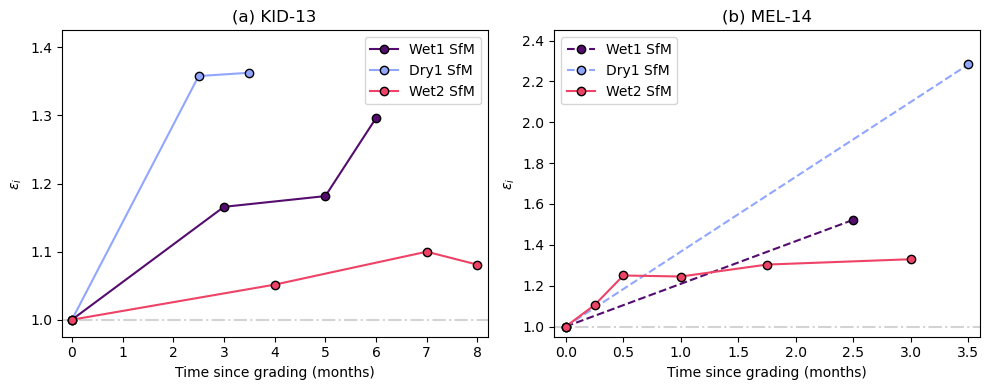

In [20]:
wsyr1_15_m14_sfm = [ero_idx_m14_20201203_15_sfm, ero_idx_m14_20210224_15_sfm]/ero_idx_m14_20201203_15_sfm
np.savetxt("/home/adalvis/github/micro_diff/wsyr1_15_m14_sfm.csv", wsyr1_15_m14_sfm, delimiter=",", fmt='%f')
dsyr1_15_m14_sfm = [ero_idx_m14_20210603_15_sfm, ero_idx_m14_20210914_15_sfm]/ero_idx_m14_20210603_15_sfm
np.savetxt("/home/adalvis/github/micro_diff/dsyr1_15_m14_sfm.csv", dsyr1_15_m14_sfm, delimiter=",", fmt='%f')
wsyr2_15_m14_sfm = [ero_idx_m14_20220309_15_sfm, ero_idx_m14_20220316_15_sfm, ero_idx_m14_20220324_15_sfm, ero_idx_m14_20220411_15_sfm, ero_idx_m14_20220428_15_sfm, ero_idx_m14_20220601_15_sfm]/ero_idx_m14_20220309_15_sfm
np.savetxt("/home/adalvis/github/micro_diff/wsyr2_15_m14_sfm.csv", wsyr2_15_m14_sfm, delimiter=",", fmt='%f')

wsyr1_15_m14_lidar = [ero_idx_m14_20201203_15_lidar]/ero_idx_m14_20201203_15_lidar
np.savetxt("/home/adalvis/github/micro_diff/wsyr1_15_m14_lidar.csv", wsyr1_15_m14_lidar, delimiter=",", fmt='%f')
dsyr1_15_m14_lidar = [ero_idx_m14_20210603_15_lidar, ero_idx_m14_20210914_15_lidar]/ero_idx_m14_20210603_15_lidar
np.savetxt("/home/adalvis/github/micro_diff/dsyr1_15_m14_lidar.csv", dsyr1_15_m14_lidar, delimiter=",", fmt='%f')
wsyr2_15_m14_lidar = [ero_idx_m14_20220309_15_lidar, ero_idx_m14_20220601_15_lidar]/ero_idx_m14_20220309_15_lidar
np.savetxt("/home/adalvis/github/micro_diff/wsyr2_15_m14_lidar.csv", wsyr2_15_m14_lidar, delimiter=",", fmt='%f')

# wsyr1_25_m14 = [ero_idx_m14_20201203_25, ero_idx_m14_20210224_25]/ero_idx_m14_20201203_25
# dsyr1_25_m14 = [ero_idx_m14_20210603_25, ero_idx_m14_20210914_25]/ero_idx_m14_20210603_25
# wsyr2_25_m14 = [ero_idx_m14_20220309_25, ero_idx_m14_20220316_25, ero_idx_m14_20220324_25, ero_idx_m14_20220411_25, ero_idx_m14_20220428_25, ero_idx_m14_20220601_25]/ero_idx_m14_20220309_25

t_m14_wsyr1_sfm = [0, 2.5]
t_m14_dsyr1_sfm = [0, 3.5]
t_m14_wsyr2_sfm = [0,0.25,0.5,1,1.75,3]

t_m14_wsyr1_lidar = [0]
t_m14_dsyr1_lidar = [0, 3.5]
t_m14_wsyr2_lidar = [0, 3]

wsyr1_15_k13_sfm = [ero_idx_k13_20201109_15_sfm, ero_idx_k13_20210208_15_sfm, ero_idx_k13_20210406_15_sfm, ero_idx_k13_20210513_15_sfm]/ero_idx_k13_20201109_15_sfm
np.savetxt("/home/adalvis/github/micro_diff/wsyr1_15_k13_sfm.csv", wsyr1_15_k13_sfm, delimiter=",", fmt='%f')
dsyr1_15_k13_sfm = [ero_idx_k13_20210604_15_sfm, ero_idx_k13_20210819_15_sfm, ero_idx_k13_20210913_15_sfm]/ero_idx_k13_20210604_15_sfm
np.savetxt("/home/adalvis/github/micro_diff/dsyr1_15_k13_sfm.csv", dsyr1_15_k13_sfm, delimiter=",", fmt='%f')
wsyr2_15_k13_sfm = [ero_idx_k13_20211007_15_sfm, ero_idx_k13_20220208_15_sfm, ero_idx_k13_20220503_15_sfm, ero_idx_k13_20220531_15_sfm]/ero_idx_k13_20211007_15_sfm
np.savetxt("/home/adalvis/github/micro_diff/wsyr2_15_k13_sfm.csv", wsyr2_15_k13_sfm, delimiter=",", fmt='%f')

wsyr1_15_k13_lidar = [ero_idx_k13_20201109_15_lidar, ero_idx_k13_20210513_15_lidar]/ero_idx_k13_20201109_15_lidar
np.savetxt("/home/adalvis/github/micro_diff/wsyr1_15_k13_lidar.csv", wsyr1_15_k13_lidar, delimiter=",", fmt='%f')
dsyr1_15_k13_lidar = [ero_idx_k13_20210604_15_lidar, ero_idx_k13_20210913_15_lidar]/ero_idx_k13_20210604_15_lidar
np.savetxt("/home/adalvis/github/micro_diff/dsyr1_15_k13_lidar.csv", dsyr1_15_k13_lidar, delimiter=",", fmt='%f')
wsyr2_15_k13_lidar = [ero_idx_k13_20211007_15_lidar, ero_idx_k13_20220531_15_lidar]/ero_idx_k13_20211007_15_lidar
np.savetxt("/home/adalvis/github/micro_diff/wsyr2_15_k13_lidar.csv", wsyr2_15_k13_lidar, delimiter=",", fmt='%f')

# wsyr1_25_k13 = [ero_idx_k13_20201109_25, ero_idx_k13_20210208_25, ero_idx_k13_20210406_25, ero_idx_k13_20210513_25]/ero_idx_k13_20201109_25
# dsyr1_25_k13 = [ero_idx_k13_20210604_25, ero_idx_k13_20210819_25, ero_idx_k13_20210913_25]/ero_idx_k13_20210604_25
# wsyr2_25_k13 = [ero_idx_k13_20211007_25, ero_idx_k13_20220208_25, ero_idx_k13_20220503_25, ero_idx_k13_20220531_25]/ero_idx_k13_20211007_25

t_k13_wsyr1_sfm = [0, 3, 5, 6]
t_k13_dsyr1_sfm = [0, 2.5, 3.5]
t_k13_wsyr2_sfm = [0,4,7,8]

t_k13_wsyr1_lidar = [0, 6]
t_k13_dsyr1_lidar = [0, 3.5]
t_k13_wsyr2_lidar = [0, 8]


fig, ax = plt.subplots(1,2, figsize=(10,4), layout='tight')
ax[0].plot([-0.3,8.3], [1.0,1.0],  '-.', color='lightgray', markeredgecolor='k', label='')
ax[0].plot(t_k13_wsyr1_sfm, wsyr1_15_k13_sfm, 'o-', color='#540D6E', markeredgecolor='k', label='Wet1 SfM')
ax[0].plot(t_k13_dsyr1_sfm, dsyr1_15_k13_sfm, 'o-', color='#91A6FF', markeredgecolor='k', label='Dry1 SfM')
ax[0].plot(t_k13_wsyr2_sfm, wsyr2_15_k13_sfm, 'o-', color='#EE4266', markeredgecolor='k', label='Wet2 SfM')
# ax[0].plot(t_k13_wsyr1_lidar[1], wsyr1_15_k13_lidar[1], 'D', markersize=6, color='#08415C', markeredgecolor='k', label='Wet1 LiDAR')
# ax[0].plot(t_k13_dsyr1_lidar[1], dsyr1_15_k13_lidar[1], 'D', markersize=6, color='#75DDDD', markeredgecolor='k', label='Dry1 LiDAR')
# ax[0].plot(t_k13_wsyr2_lidar[1], wsyr2_15_k13_lidar[1], 'D', markersize=6, color='#CC2936', markeredgecolor='k', label='Wet2 LiDAR')
ax[0].set(ylabel=r'$\epsilon_{i}$', xlim=(-0.2,8.2), ylim=(0.975,1.425),title='(a) KID-13', xlabel='Time since grading (months)')
ax[0].legend()

# ax[0,1].plot([-0.3,8.3], [1.0,1.0],  '-.', color='lightgray', markeredgecolor='k', label='')
# ax[0,1].plot(t_k13_wsyr1, wsyr1_25_k13, 'o-', color='#08415C', markeredgecolor='k', label='Wet1')
# ax[0,1].plot(t_k13_dsyr1, dsyr1_25_k13, 'o-', color='#75DDDD', markeredgecolor='k', label='Dry1')
# ax[0,1].plot(t_k13_wsyr2, wsyr2_25_k13, 'o-', color='#CC2936', markeredgecolor='k', label='Wet2')
# ax[0,1].set(ylabel=r'$\epsilon_{ni,2.5}$', xlim=(-0.2,8.2), ylim=(0.925,1.475), title='(b) KID-13, $x=2.5$', xlabel='Time since grading (months)')
# ax[0,1].legend()

ax[1].plot([-0.3,8.3], [1.0,1.0],  '-.', color='lightgray', markeredgecolor='k', label='')
ax[1].plot(t_m14_wsyr1_sfm, wsyr1_15_m14_sfm, 'o--', color='#540D6E', markeredgecolor='k', label='Wet1 SfM')
ax[1].plot(t_m14_dsyr1_sfm, dsyr1_15_m14_sfm, 'o--', color='#91A6FF', markeredgecolor='k', label='Dry1 SfM')
ax[1].plot(t_m14_wsyr2_sfm, wsyr2_15_m14_sfm, 'o-', color='#EE4266', markeredgecolor='k', label='Wet2 SfM')
# ax[1].plot(t_m14_dsyr1_lidar[1], dsyr1_15_m14_lidar[1], 'D', markersize=6, color='#75DDDD', markeredgecolor='k', label='Dry1 LiDAR')
# ax[1].plot(t_m14_wsyr2_lidar[1], wsyr2_15_m14_lidar[1], 'D', markersize=6, color='#CC2936', markeredgecolor='k', label='Wet2 LiDAR')
ax[1].set(ylabel=r'$\epsilon_{i}$',xlim=(-0.1,3.6), ylim=(0.95,2.45), title=r"(b) MEL-14", xlabel='Time since grading (months)')
ax[1].legend()

# ax[1,1].plot([-0.3,8.3], [1.0,1.0],  '-.', color='lightgray', markeredgecolor='k', label='')
# ax[1,1].plot(t_m14_wsyr1, wsyr1_25_m14, '^--', color='#08415C', markeredgecolor='k', label='Wet1')
# ax[1,1].plot(t_m14_dsyr1, dsyr1_25_m14, '^--', color='#75DDDD', markeredgecolor='k', label='Dry1')
# ax[1,1].plot(t_m14_wsyr2, wsyr2_25_m14, '^-', color='#CC2936', markeredgecolor='k', label='Wet2')
# ax[1,1].set(ylabel=r'$\epsilon_{ni,2.5}$', xlim=(-0.1,3.6), ylim=(0.925,2.825), title=r'(d) MEL-14, $x=2.5$', xlabel='Time since grading (months)') 
# ax[1,1].legend()
plt.savefig('/mnt/c/Users/Amanda/OneDrive - UW/Dissertation Writing/Chapters/Ch4_mt/Fig12.png', dpi=600, bbox_inches='tight')
plt.show();